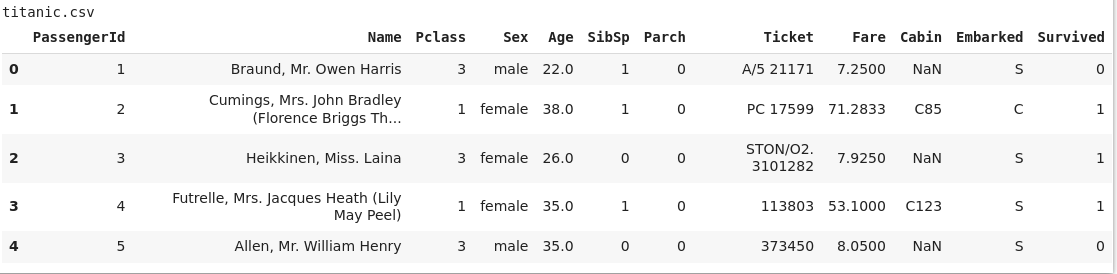

In [2]:
import pandas as pd
df = pd.read_csv("titanic.csv")
print('titanic.csv')
df.head()

titanic.csv


,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [7]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [8]:
inputs = df.drop('Survived',axis='columns')
target = df.Survived

In [9]:
dummies = pd.get_dummies(inputs.Sex)
dummies.head(3)

,female,male
0,0,1
1,1,0
2,1,0


In [10]:
inputs = pd.concat([inputs,dummies],axis='columns')
inputs.head(3)

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0


I am dropping male column as well because of dummy variable trap theory. One column is
enough to repressent male vs female

In [11]:
inputs.drop(['Sex','male'],axis='columns',inplace=True)
inputs.head(3)

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1


In [12]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [13]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [14]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head()

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.3)

In [17]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [18]:
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [19]:
model.score(X_test,y_test)

0.7686567164179104

In [20]:
X_test[0:10]

,Pclass,Age,Fare,female
86,3,16.0,34.3750,0
171,3,4.0,29.1250,0
450,2,36.0,27.7500,0
762,3,20.0,7.2292,0
272,2,41.0,19.5000,1
463,2,48.0,13.0000,0
607,1,27.0,30.5000,0
271,3,25.0,0.0000,0
819,3,10.0,27.9000,0
794,3,25.0,7.8958,0


In [21]:
y_test[0:10]

86     0
171    0
450    0
762    1
272    1
463    0
607    1
271    1
819    0
794    0
Name: Survived, dtype: int64

In [22]:
model.predict(X_test[0:10])

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [23]:
model.predict_proba(X_test[:10])

array([[0.94909502, 0.05090498],
       [0.9284856 , 0.0715144 ],
       [0.92943901, 0.07056099],
       [0.95860758, 0.04139242],
       [0.25576282, 0.74423718],
       [0.93257387, 0.06742613],
       [0.76795822, 0.23204178],
       [0.96052699, 0.03947301],
       [0.94306507, 0.05693493],
       [0.96274905, 0.03725095]])

Calculate the score using cross validation

In [24]:
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),X_train, y_train, cv=5)

array([0.752     , 0.8       , 0.776     , 0.70967742, 0.81451613])